# **2/2568 FRA501: Pattern Recognition - HW1 Clustering and Regression**
**Member**
- Pavaris Asawakijtananont

In [24]:
import pandas as pd
import numpy as np
import math
import os
import copy
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Exploration**

In [55]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

**Train Set**

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
print(f"Train set shape {train.shape}")
train.describe()


Train set shape (891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- From the table this dataset contain with 11 Features with 891 sample(row), diverse of input data type can be seen that this dataset including, categorical feature and numerical feature. and `NaN` also included in this dataset.
- Although dataset contain 12 column, usable features are only 10 feature because of another 2 columns are number of row and passenger number.      

**Test Set**

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [61]:
print(f"Test set shape {test.shape}")
train.describe()


Test set shape (418, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- In test set, we can see the dataset with 11 column and 418 sample. In dataset is not included with `Survived`, and `missing value (NaN)` can be seen too
- In `Age` column we can see that it including with **float number  (row 415)** 

> **`IMPORTANT NOTE`** : we will not use **Test set** because it lack of **Target Value `Survived`** 

In [62]:
print(f"Train set shape {train.shape} \n Test set shape {test.shape}")

Train set shape (891, 12) 
 Test set shape (418, 11)


- We can use the `.head()` to see the first 5 row, and `.tail()` to see the last 5 row in dataset to observe dataset roughly before deep into each feature for Feature engineering in next part
-  Moreover, `.decribe()` can be used for see the basic statistic of our data, to preprocess in next part.
- Feature type is summarize in following table. This table not include the passenger number

| Variable  | Definition                                   | Key                                   |  Feature Type
|-----------|----------------------------------------------|----------------------------------------|------------------------------- |
| Survived  | Survival                                     | 0 = No, 1 = Yes                         | Nominal Categorical           |
| Pclass    | Ticket class                                 | 1 = 1st, 2 = 2nd, 3 = 3rd               | Ordinal Categorical           |
| Name      | Passenger name                               |                                        | Nominal Categorical            |
| PassengerId    | Passenger Id                             |                                        | Ordinal Categorical           |
| Sex       | Sex                                          |                                        | Nominal Categorical            |
| Age       | Age in years                                 |                                        | Numerical                      |
| SibSp     | # of siblings / spouses aboard the Titanic   |                                        | Numerical                      |
| Parch     | # of parents / children aboard the Titanic   |                                        | Numerical                      |
| Ticket    | Ticket number                                |                                        | Nominal Categorical            |
| Fare      | Passenger fare                               |                                        | Numerical                      |
| Cabin     | Cabin number                                 |                                        | Nominal Categorical            |
| Embarked  | Port of Embarkation                          | C = Cherbourg, Q = Queenstown, S = Southampton | Nominal Categorical    |

- From roughly data explorationm, we can identify useless feature in this dataset. Firstly, `PassengerId` should not be effect to `Survived` because it just the identity number, which is unique for all passenger. Secondly, `Name` is similar to `PassengerId`, it unique for all passenger. (If we not a reaper, we don't care the names)
- Meanwhile, `Ticket` is categorical feature, should be check for unique number of this feature preventing high dimensional feature.

In [63]:
print(f"Number of Unique value in Ticket column : {len(train['Ticket'].unique())}")

Number of Unique value in Ticket column : 681


- `Ticket` has 681 unique value and this feature is not ordinal number, can be sort in number. We consider to remove `Ticket` from our dataset

- other categorical feature should be test too, for define very unique value 

In [64]:

for i in ['Pclass' , 'Sex' , 'Cabin' , 'Embarked' , 'Survived']:
    print(f"Number of Unique value in {i} column : {len(train[i].unique())}")

Number of Unique value in Pclass column : 3
Number of Unique value in Sex column : 2
Number of Unique value in Cabin column : 148
Number of Unique value in Embarked column : 4
Number of Unique value in Survived column : 2


- It should be noted that `Cabin` also has unique value, compared to other categorical feature contain only 2-4 group
- `Cabin` feature must be plot to consider the distribution before drop it out.

In [65]:
train0 = train.drop(columns=["Name","PassengerId","Ticket"])
test0 = test.drop(columns=["Name","PassengerId","Ticket"])

- Finalist features are summarize in below tables

| Variable  | Definition                                   | Key                                   |  Feature Type
|-----------|----------------------------------------------|----------------------------------------|------------------------------- |
| Age       | Age in years                                 |                                        | Numerical                      |
| SibSp     | # of siblings / spouses aboard the Titanic   |                                        | Numerical / Ordinal Categorical|
| Parch     | # of parents / children aboard the Titanic   |                                        | Numerical / Ordinal Categorical|
| Fare      | Passenger fare                               |                                        | Numerical                      |
| Pclass    | Ticket class                                 | 1 = 1st, 2 = 2nd, 3 = 3rd               | Ordinal Categorical           |
| Sex       | Sex                                          |                                        | Nominal Categorical            |
| Cabin     | Cabin number                                 |                                        | Nominal Categorical            |
| Embarked  | Port of Embarkation                          | C = Cherbourg, Q = Queenstown, S = Southampton | Nominal Categorical    |
| Survived  | Survival                                     | 0 = No, 1 = Yes                         | Nominal Categorical           |


- We have 4 feature of numberical, 6 feature of categorical(include target `Survived`) following the table (`P class` was consider to be categorical because difference type of `Ticket` can be effect to `Survived` (**e.g**. Type 2 can effect to Survived the most))

---

#### **Data Exploration : Plotting**

In [66]:
# num_fea = train0.describe().columns.tolist()
# num_fea = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
num_fea = ['Age','SibSp','Parch','Fare']
cat_fea = ['Pclass' , 'Sex' , 'Cabin' , 'Embarked' , 'Survived']
print(f"Numericl Feature :{num_fea}")

Numericl Feature :['Age', 'SibSp', 'Parch', 'Fare']


##### **Training**

 **Numerical**

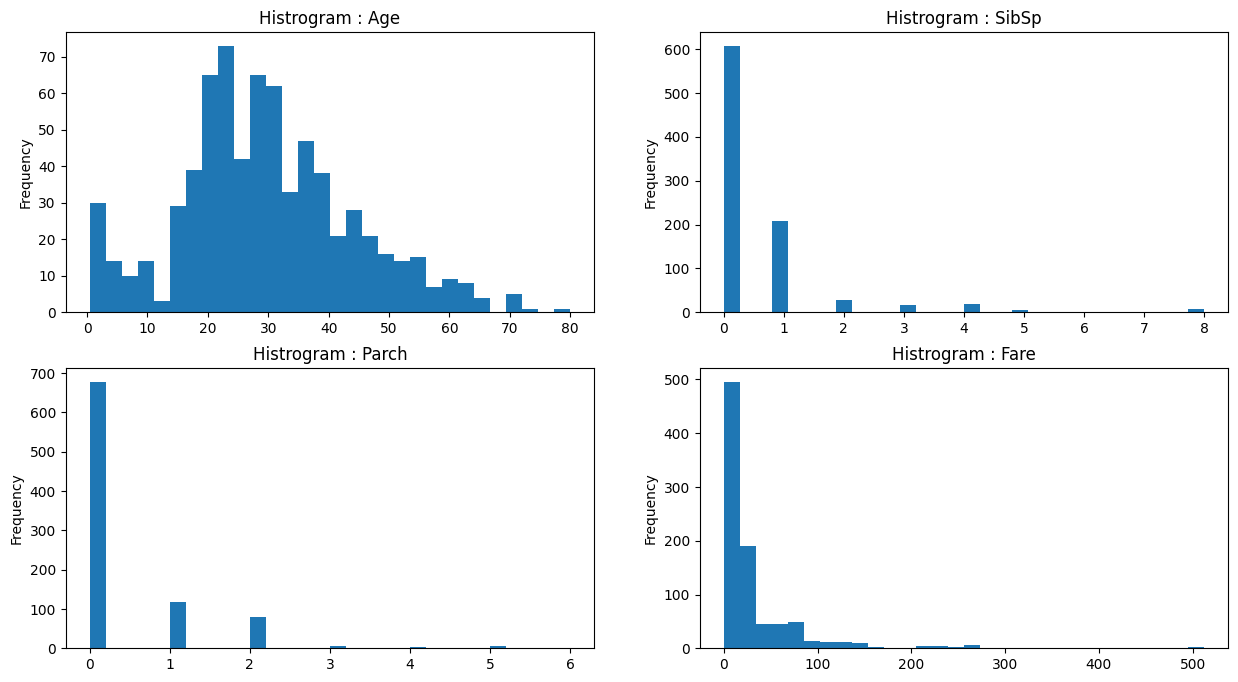

In [67]:
plt.figure(figsize=(15, 8))   # width, height in inches
for i in range(len(num_fea)):
    plt.subplot(2,2,i+1)
    train[num_fea[i]].plot(kind='hist', bins=30,title=f"Histrogram : {num_fea[i]}")
    # plt.plot(num_k,value_to_plot[i],'*-', markersize=10)
    # plt.title(title[i])
    

- **`Age`** : The distribution is roughly bell-shaped with a slight right skew. Most passengers are young adults, and there are some infants and elderly passengers.
- **`SibP`** : Highly right-skewed. Most passengers traveled without siblings or spouses (value 0), with a few large-family `outliers`. 
- **`Parch`** : Also right-skewed. Most passengers traveled without parents or children, and higher values are rare.
- **`Fare`** : Strongly right-skewed. Most fares are low, while a small number of passengers paid very high prices. `outliers`

 **Categorical**

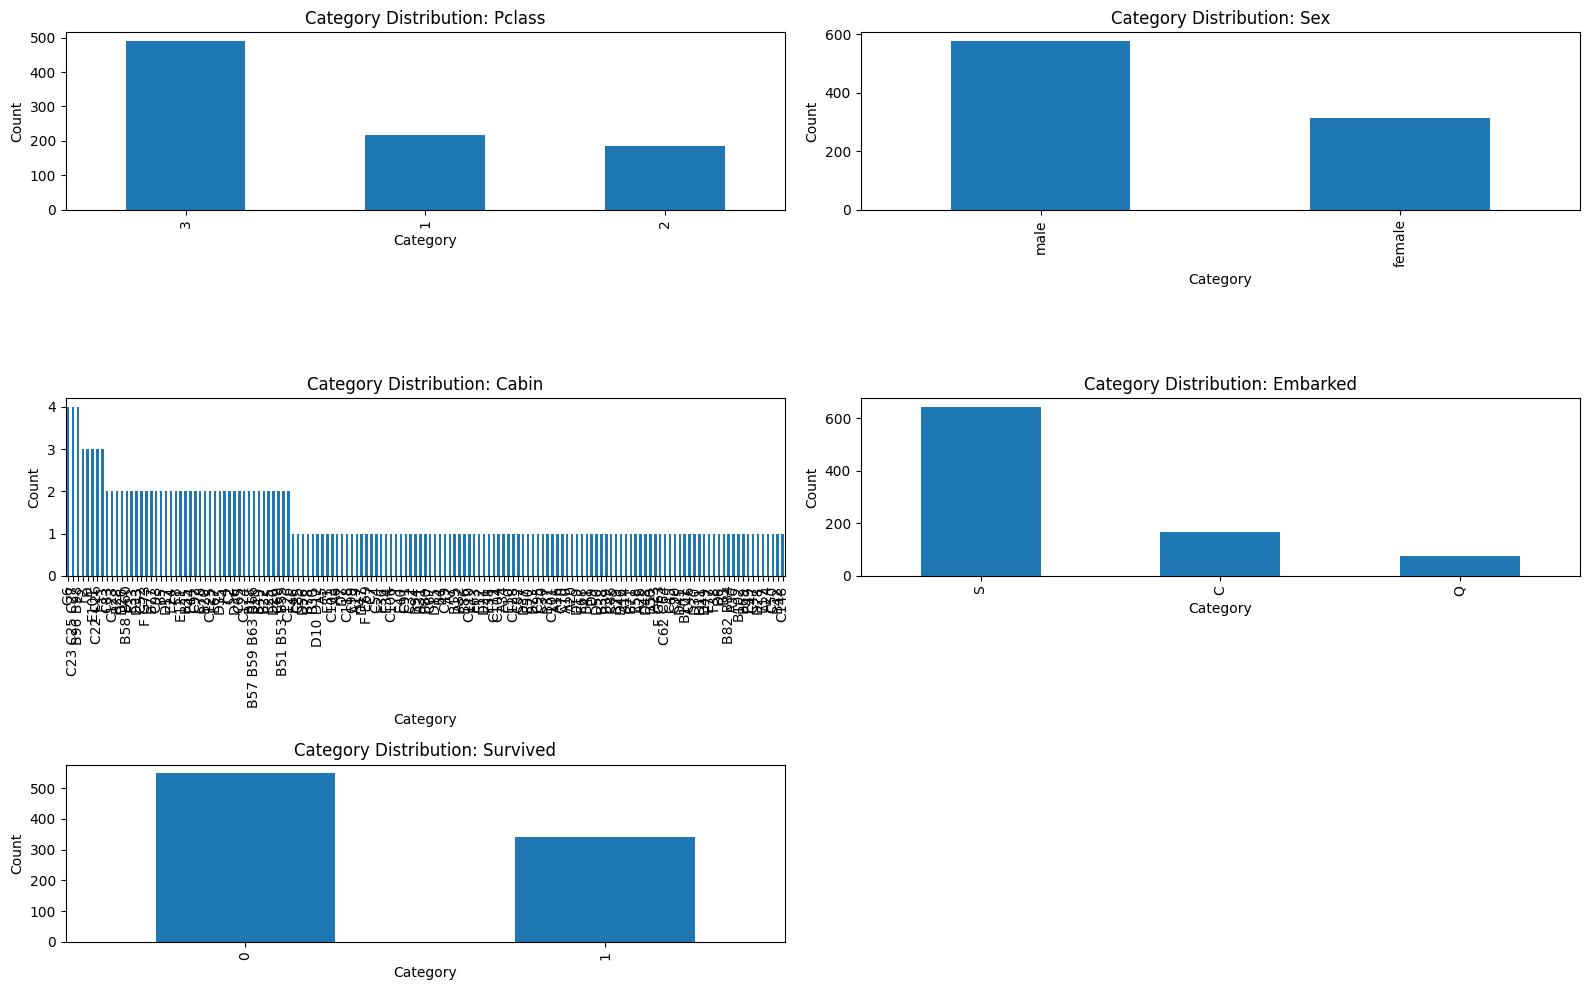

In [68]:
plt.figure(figsize=(16, 10))   # width, height in inches

for i in range(len(cat_fea)):
    plt.subplot(3, 2, i+1)
    train[cat_fea[i]].value_counts().plot(kind='bar')
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.title(f"Category Distribution: {cat_fea[i]}")

plt.tight_layout()
plt.show()

- `Pclass`: Most passengers are in 3rd class, followed by 1st class, then 2nd class. This indicates that the dataset is dominated by lower-class passengers.
- `Sex`: There are more male passengers than female passengers.
- `Cabin`: Many unique cabin values appear with very low frequencies, indicating high sparsity and many missing or rare categories.
- `Embarked`: Most passengers embarked from S (Southampton), followed by C (Cherbourg) and Q (Queenstown).
- `Survived`: More passengers did not survive than survived, showing class imbalance in the target variable.`

- From the results, **we decided to drop the `Cabin`** feature because it contains a very large number of unique categories, most of which appear only a few times. This high sparsity leads to a high-variance distribution and would introduce high dimensional to our model.

In [69]:
train1 = train0.drop(columns=["Cabin"])
test1 = test0.drop(columns=["Cabin"])

### **Outlier treatment**

- In this section, we handle outliers in the dataset based on the distribution of each feature.
- Features that contain extreme outliers should be cleaned or treated, as these values can introduce **`bias`** and negatively affect model performance.
- The features that require outlier handling are `SibSp` and `Fare`:
    - From the distribution, `SibSp` contains an outlier around 8.
    - `Fare` shows extreme values around 500.

- Both `SibSp` and `Fare` are highly right-skewed features. Therefore, we consider removing extreme outliers that lie far from the main distribution. Specifically, values greater than `5` for `SibSp` and greater than `300` for `Fare` are treated as outliers.

In [80]:
sibsp_count = (train1['SibSp'] > 5).sum()
fare_count  = (train1['Fare'] > 300).sum()

print("SibSp > 5:", sibsp_count)
print("Fare > 300:", fare_count)

SibSp > 5: 7
Fare > 300: 3


- If we count the number of `SibSp` values greater than **5**, we find that there are only **8** samples, and these correspond to just 3 distinct values. Therefore, we use **> 5** as a threshold for identifying outliers in `SibSp`.
- In contrast, `Fare` contains extreme values around **550**, which are far from the main distribution and can be considered outliers; thus, we remove these outlier samples.

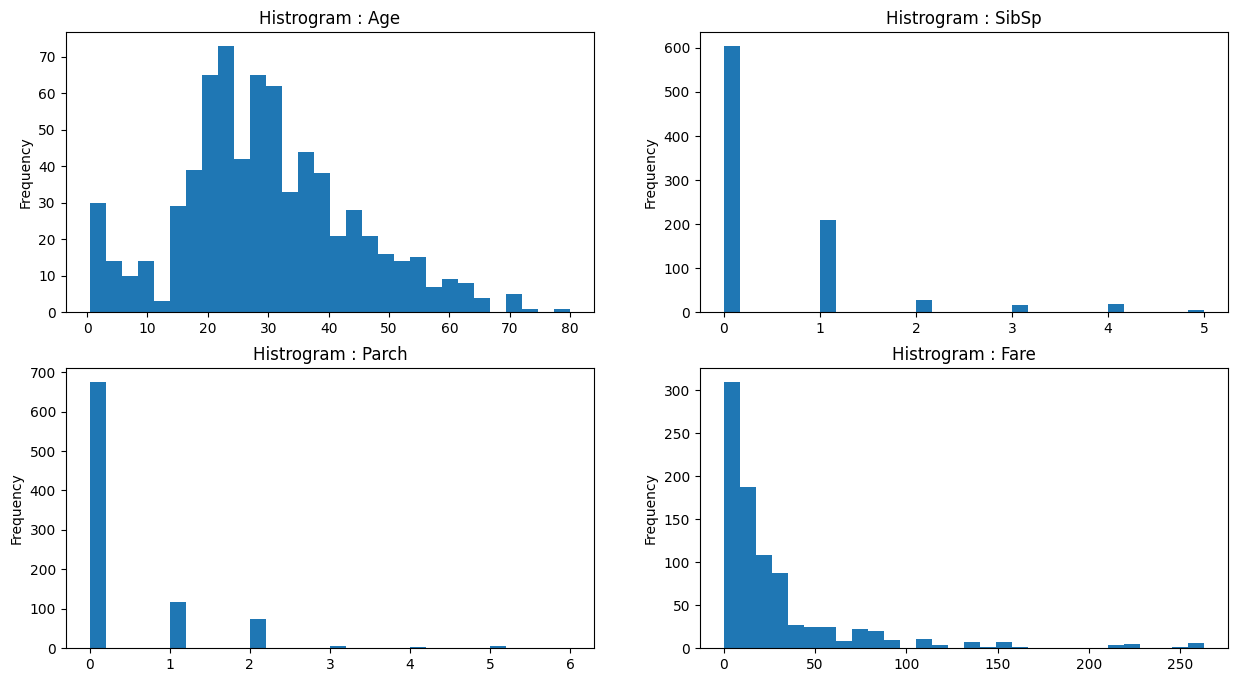

In [81]:
train2 = train1[~((train1['SibSp'] > 5) | (train1['Fare'] > 300))]
plt.figure(figsize=(15, 8))   # width, height in inches
for i in range(len(num_fea)):
    plt.subplot(2,2,i+1)
    train2[num_fea[i]].plot(kind='hist', bins=30,title=f"Histrogram : {num_fea[i]}")

- After outlier treatment the `SibSp`,`Fare` distribution are better than before, but in `Fare` we still can observe the tiny 2 island around 225 and 250

---
---
---

In [82]:
train2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         170
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### 2.1. What is the median age of the training set? You can easily modify the age in the dataframe.
Note that you need to modify the code above a bit to fill with mode() because mode() returns
a series rather than a single value.

In [83]:
df = train2

In [84]:
print("Number of missing Age values:", df["Age"].isnull().sum())
print("Median Age:", df["Age"].median())
print("Mode Age:", df["Age"].mode()[0])

Number of missing Age values: 170
Median Age: 28.0
Mode Age: 24.0


In [85]:
# df["Age"] = df["Age"].fillna(df["Age"].median())
df["Age"] = df["Age"].fillna(df["Age"].mode()[0]) #Fill missing Age with Mode

/tmp/ipykernel_37715/2542908558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].fillna(df["Age"].mode()[0]) #Fill missing Age with Mode


In [86]:
print("Number of missing Age values:", df["Age"].isnull().sum())
print("Median Age:", df["Age"].median())
print("Mode Age:", df["Age"].mode()[0])

Number of missing Age values: 0
Median Age: 24.0
Mode Age: 24.0


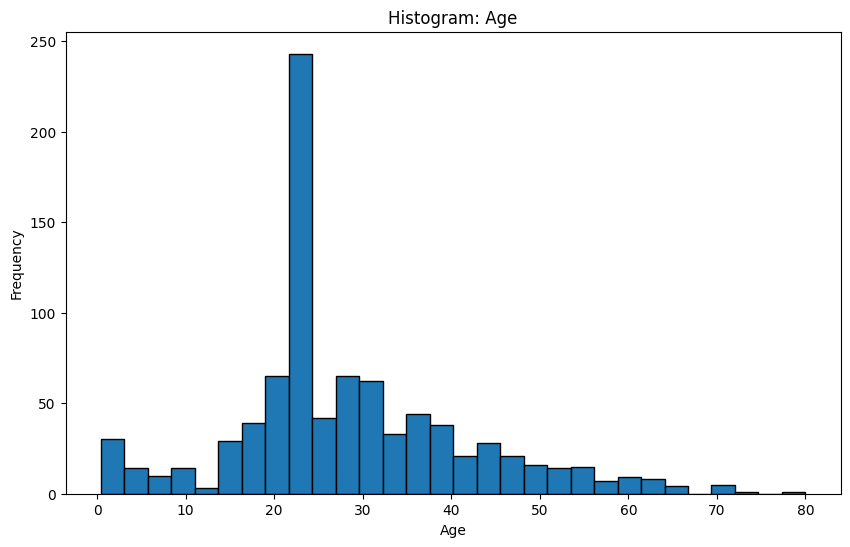

In [87]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=30, title='Histogram: Age', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**`ANSWER`**: The median of `Age` before fill missing value is 28 and after fill missing value with mode median of `Age` have change to 24 because dataset have high amount of missing values in `Age` (170 datas was missing) 

### 2.2. Converted to numbers 
Some fields like ‘Embarked’ are categorical. They need to be converted to numbers
first. We will represent S with 0, C with 1, and Q with 2. What is the mode of Embarked?
Fill the missing values with the mode. You can set the value of Embarked easily with the
following command. Do the same for Sex.

In [88]:
print("Mode of Embarked:", df["Embarked"].mode()[0])

Mode of Embarked: S


In [89]:
df.loc[:,"Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [90]:
df["Embarked"].isnull().sum()

np.int64(0)

In [91]:
# df.loc[df["Embarked"] == "S", "Embarked"] = 0
# df.loc[df["Embarked"] == "C", "Embarked"] = 1
# df.loc[df["Embarked"] == "Q", "Embarked"] = 2
df["Embarked"] = df["Embarked"].map({
    "S": 0,
    "C": 1,
    "Q": 2
})
df.loc[df["Sex"] == "male", "Sex"] = "0"
df.loc[df["Sex"] == "female", "Sex"] = "1"
df["Sex"] = df["Sex"].astype(float)
df.describe()

/tmp/ipykernel_37715/2436845354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"] = df["Embarked"].map({
/tmp/ipykernel_37715/2436845354.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df["Sex"].astype(float)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,0.384790,2.307605,0.351873,28.580216,0.465380,0.368899,30.272544,0.362089
std,0.486822,0.835055,0.477826,13.262188,0.883687,0.797088,41.192295,0.637372
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.500000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,263.000000,2.000000


In [92]:
df["Embarked"]

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 881, dtype: int64

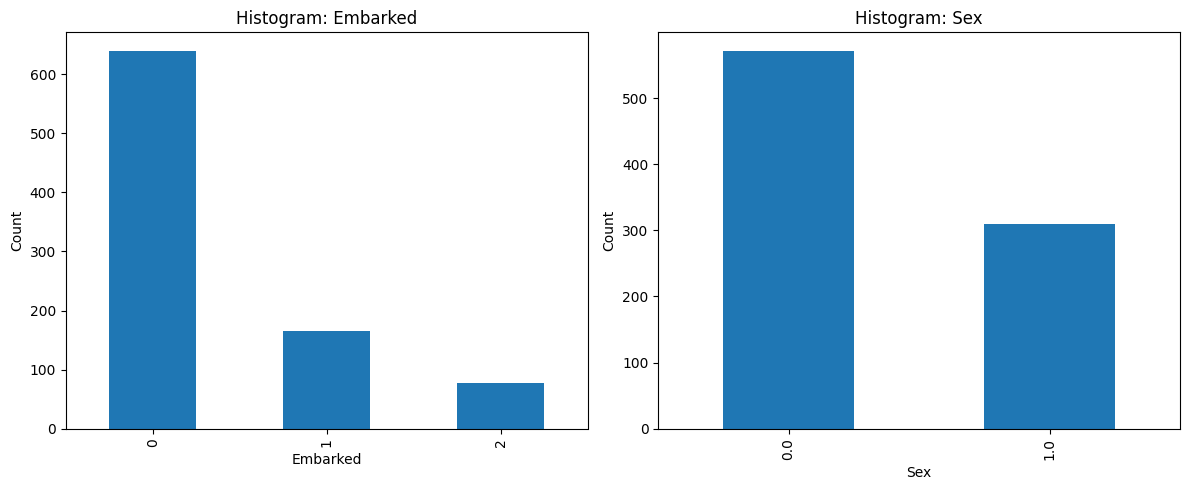

In [93]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Histogram: Embarked')

plt.subplot(1, 2, 2)
df['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Histogram: Sex')

plt.tight_layout()
plt.show()

**`ANSWER`**: The mode of `Embarked` before is S (0) and We will represent `male` with 0 and `female` with 1 in column `Sex`  

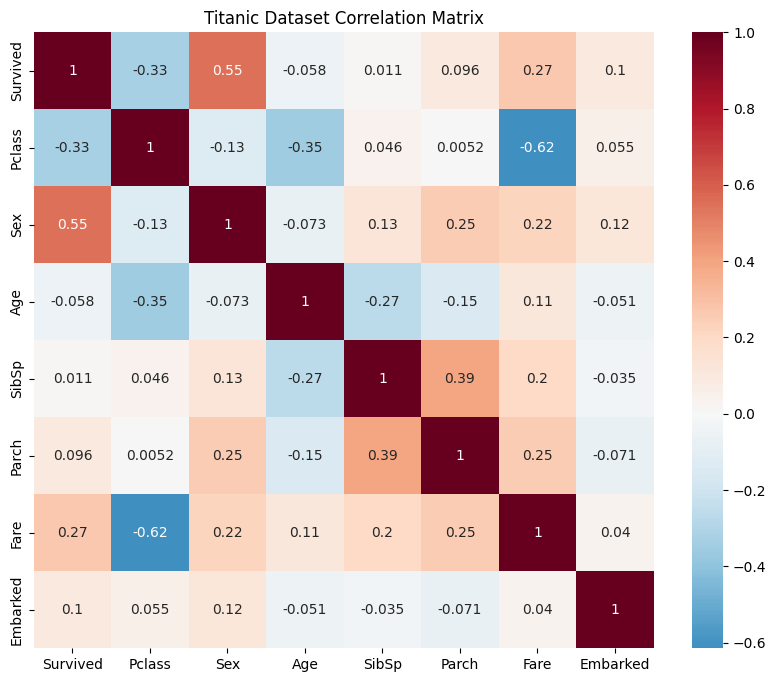

In [94]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0)
plt.title("Titanic Dataset Correlation Matrix")
plt.show()

From the correlation matrix, we observed that two features `Pclass` and `Sex` have the strongest correlation with the target variable. 
Therefore, We assume that the trained model should give higher priority to these two features.

### 2.3. Write a logistic regression classifier using gradient descent 
(from scratch, don’t use scikit-learn framework or others) as learned in class (Survived). Use PClass, Sex, Age,
and Embarked as input features.

For Logistic regression we will force output to be between 0 and 1 with `Sigmoid function`

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

We will pass $\theta^T x$ through the `Sigmoid function`

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

- $h_\theta(x)$ : Predict
- $\theta$ : Weights
- $x$ : Features

For Logistic regression update we update by gradient descent update. (The cost function is `Cross entropy` error)

$$
\theta_j = \theta_j + r\sum^{m}_{i=1}(y_i - h_\theta(x_i))x_i^{(j)}
$$

- $\theta$ : Weights
- $r$ : Learning rate
- $m$ : Iterations

In [ ]:
import numpy as np

class LogisticRegressionSelfMade:
    def __init__(self, lr=0.01, iterations=1000, threshold=0.5):
        self.lr = lr # Learning Rate
        self.iterations = iterations
        self.threshold = threshold 
        self.weights = None # Theta
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) # Sigmoid function

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # 1. Initial weights
        self.weights = np.zeros(n_features) # Initialize weights to zeros
        self.bias = 0

        # 2. Gradient Descent Loop
        for _ in range(self.iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Send model into Sigmoid
            y_predicted = self._sigmoid(linear_model)

            # 3. calculate gredient
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) # Gradient w.r.t weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # 4. update parameter
            self.weights -= self.lr * dw # Update weights
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)

        # If predicted value more than threshold -> 1 else -> 0
        return [1 if i > self.threshold else 0 for i in y_predicted]

To avoid features with large units get punished we will use `StandardScaler` to standardization data before train and force the data to float datatype.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split Data into Train:Test = 80:20
train_data_23, test_data_23 = train_test_split(df, test_size=0.2, random_state=42)
X_train_23 = np.array(train_data_23[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
X_test_23 = np.array(test_data_23[["Pclass","Sex","Age","Embarked"]].values, dtype = float)

# Normalize Data
scaler = StandardScaler()
X_train_23 = scaler.fit_transform(X_train_23)
y_train_23 = np.array(train_data_23[["Survived"]].values, dtype = float)

X_test_23 = scaler.transform(X_test_23)
y_test_23 = np.array(test_data_23[["Survived"]].values, dtype = float)

After standardization Feature Value

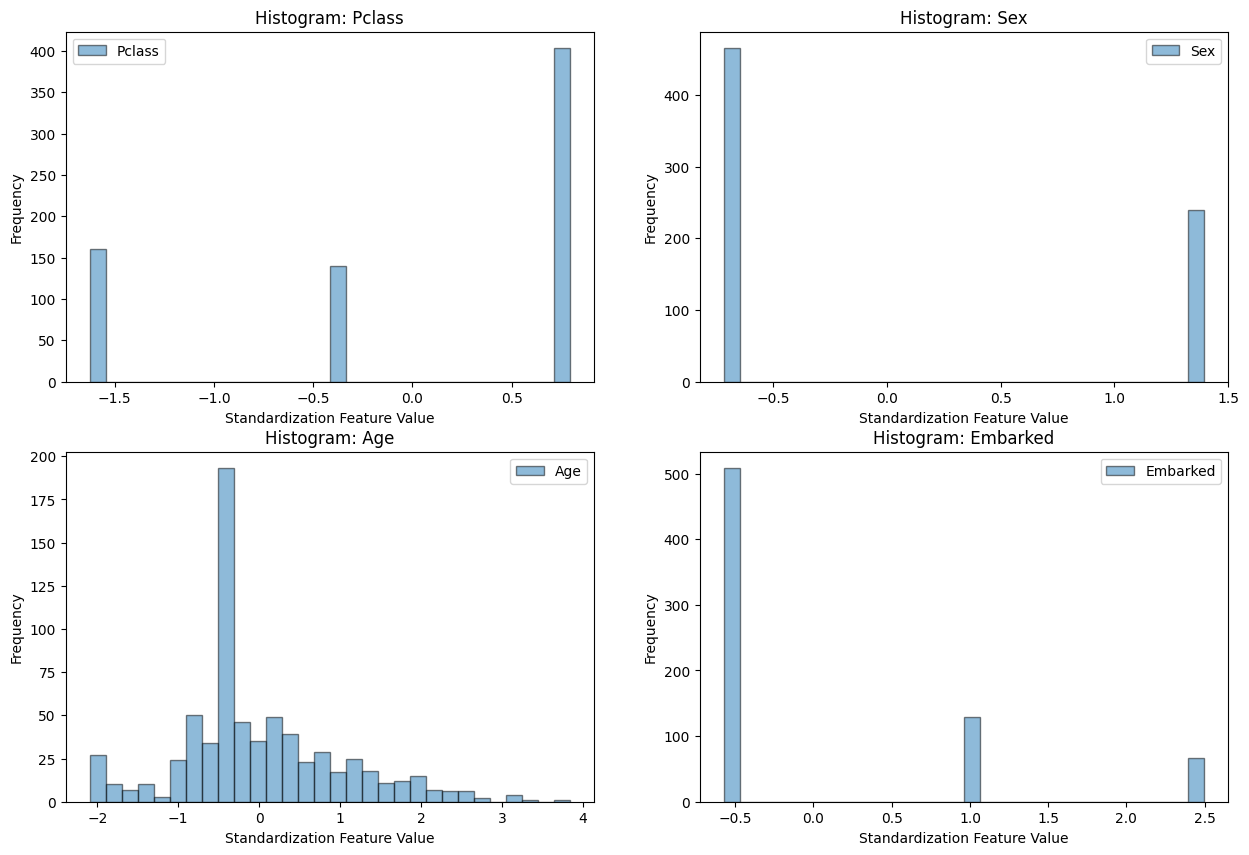

In [ ]:
select_fea = ['Pclass' , 'Sex' , 'Age' , 'Embarked']
plt.figure(figsize=(15, 10))   # width, height in inches
for i in range(len(select_fea)):
    plt.subplot(2,2,i+1)
    plt.hist(X_train_23[:, i], bins=30, alpha=0.5, label=select_fea[i], edgecolor='black')
    plt.xlabel('Standardization Feature Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram: {select_fea[i]}')
    plt.legend()

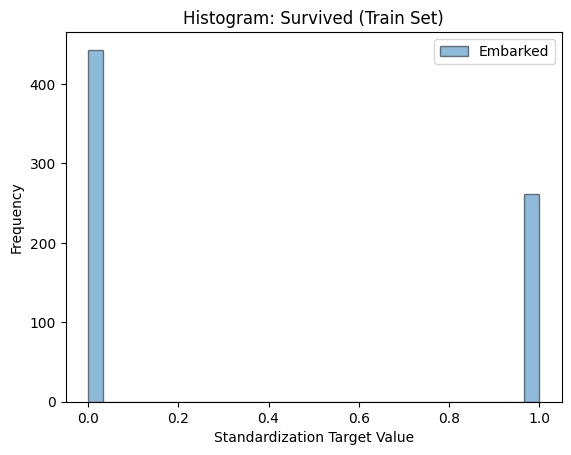

In [ ]:
plt.hist(y_train_23, bins=30, alpha=0.5, label=select_fea[i], edgecolor='black')
plt.xlabel('Standardization Target Value')
plt.ylabel('Frequency')
plt.title(f'Histogram: Survived (Train Set)')
plt.legend()

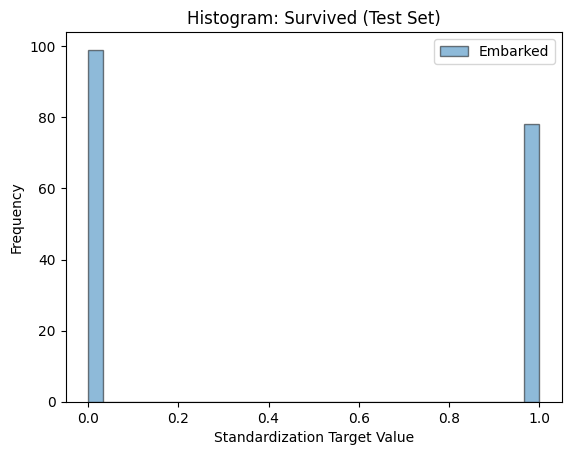

In [ ]:
plt.hist(y_test_23, bins=30, alpha=0.5, label=select_fea[i], edgecolor='black')
plt.xlabel('Standardization Target Value')
plt.ylabel('Frequency')
plt.title(f'Histogram: Survived (Test Set)')
plt.legend()

Training and Show parameter

In [ ]:
X_train_23 = np.array(X_train_23)
y_train_23 = np.array(y_train_23).ravel()

# Call model class
model_23 = LogisticRegressionSelfMade()
model_23.fit(X_train_23, y_train_23)

# Predict
y_train_pred_23 = model_23.predict(np.array(X_train_23))
y_test_pred_23 = model_23.predict(np.array(X_test_23))

# Show Parameter
print(f"Weights: {model_23.weights}")
print(f"Bias: {model_23.bias}")

Weights: [-0.66551447  0.93025321 -0.23881104  0.12773753]
Bias: -0.533593910903719


From the learned weights, we found that `Pclass` and `Sex` have higher weights than the other features, which is consistent with our assumption.That `Age` and `Embarked` are not significant to predict survival.

### 2.4 Evaluate the trained model on the test set
When you evaluate the trained model on the test set, you will need to
make a final decision. Since logistic regression outputs a score between 0 and 1,
you will need to decide whether a score of 0.3 (or any other number) means the
passenger survive or not. For now, we will say if the score is greater than or equal
to 0.5, the passenger survives. If the score is lower than 0.5 the passenger will be
dead. This process is often called ‘Thresholding.’ Then, show your precision, recall,
f1-score on the training set and test set.

In [96]:
from sklearn.metrics import classification_report

def extract_macro_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return [
        report['macro avg']['precision'],
        report['macro avg']['recall'],
        report['macro avg']['f1-score']
    ]
    
def extract_weight_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return [
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    ]

def radar_train_test(y_train, y_train_pred, y_test, y_test_pred, title):

    labels = ['Precision', 'Recall', 'F1-score']
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    train_avg = extract_macro_metrics(y_train, y_train_pred)
    test_avg  = extract_macro_metrics(y_test, y_test_pred)

    train_avg += train_avg[:1]
    test_avg  += test_avg[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

    ax.plot(angles, train_avg, 'o-', linewidth=2, label='Train')
    ax.fill(angles, train_avg, alpha=0.25)

    ax.plot(angles, test_avg, 'o-', linewidth=2, label='Test')
    ax.fill(angles, test_avg, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_ylim(0,1)

    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()


In [95]:
def radar_train_test_multi(results_list, labels=['Precision', 'Recall', 'F1-score']):
    n_plots = len(results_list)
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1] 

    # We increase the bottom margin (bottom=0.2) to make room for the text
    fig, axes = plt.subplots(1, n_plots, figsize=(6 * n_plots, 7), subplot_kw=dict(polar=True))
    
    if n_plots == 1:
        axes = [axes]

    for i, data in enumerate(results_list):
        ax = axes[i]
        
        # 1. Extract and format metrics
        # (Assuming these return a list of 3 floats: [p, r, f1])
        train_vals = extract_macro_metrics(data['y_train'], data['y_train_pred'])
        test_vals  = extract_macro_metrics(data['y_test'], data['y_test_pred'])

        # Plotting logic
        train_plot = train_vals + [train_vals[0]]
        test_plot  = test_vals + [test_vals[0]]

        ax.plot(angles, train_plot, 'o-', linewidth=2, label='Train', color='blue')
        ax.fill(angles, train_plot, alpha=0.1, color='blue')
        ax.plot(angles, test_plot, 'o-', linewidth=2, label='Test', color='red')
        ax.fill(angles, test_plot, alpha=0.1, color='red')

        ax.set_thetagrids(np.degrees(angles[:-1]), labels)
        ax.set_ylim(0, 1)
        ax.set_title('Macro Avg '+ data.get('title', f'Model {i+1}'), size=15, pad=30)

        # 2. Add Raw Data Text Underneath
        # We use transform=ax.transAxes to place text relative to the subplot (0,0 is bottom left)
        stats_text = (
            f"{'Metric':<10} | {'Train':>6} | {'Test':>6}\n"
            f"{'-'*30}\n"
            f"{labels[0]:<10} | {train_vals[0]:.3f} | {test_vals[0]:.3f}\n"
            f"{labels[1]:<10} | {train_vals[1]:.3f} | {test_vals[1]:.3f}\n"
            f"{labels[2]:<10} | {train_vals[2]:.3f} | {test_vals[2]:.3f}"
        )
        
        # Position the text box below the polar plot
        ax.text(0.5, -0.25, stats_text, transform=ax.transAxes,
                fontsize=10, family='monospace', ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))
        
        if i == n_plots - 1:
            ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Adjust layout to ensure the text boxes aren't cut off
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
def radar_train_test_weight_multi(results_list, labels=['Precision', 'Recall', 'F1-score']):
    n_plots = len(results_list)
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1] 

    # We increase the bottom margin (bottom=0.2) to make room for the text
    fig, axes = plt.subplots(1, n_plots, figsize=(6 * n_plots, 7), subplot_kw=dict(polar=True))
    
    if n_plots == 1:
        axes = [axes]

    for i, data in enumerate(results_list):
        ax = axes[i]
        
        # 1. Extract and format metrics
        # (Assuming these return a list of 3 floats: [p, r, f1])
        train_vals = extract_weight_metrics(data['y_train'], data['y_train_pred'])
        test_vals  = extract_weight_metrics(data['y_test'], data['y_test_pred'])

        # Plotting logic
        train_plot = train_vals + [train_vals[0]]
        test_plot  = test_vals + [test_vals[0]]

        ax.plot(angles, train_plot, 'o-', linewidth=2, label='Train', color='blue')
        ax.fill(angles, train_plot, alpha=0.1, color='blue')
        ax.plot(angles, test_plot, 'o-', linewidth=2, label='Test', color='red')
        ax.fill(angles, test_plot, alpha=0.1, color='red')

        ax.set_thetagrids(np.degrees(angles[:-1]), labels)
        ax.set_ylim(0, 1)
        ax.set_title('Weighted Avg '+ data.get('title', f'Model {i+1}'), size=15, pad=30)

        # 2. Add Raw Data Text Underneath
        # We use transform=ax.transAxes to place text relative to the subplot (0,0 is bottom left)
        stats_text = (
            f"{'Metric':<10} | {'Train':>6} | {'Test':>6}\n"
            f"{'-'*30}\n"
            f"{labels[0]:<10} | {train_vals[0]:.3f} | {test_vals[0]:.3f}\n"
            f"{labels[1]:<10} | {train_vals[1]:.3f} | {test_vals[1]:.3f}\n"
            f"{labels[2]:<10} | {train_vals[2]:.3f} | {test_vals[2]:.3f}"
        )
        
        # Position the text box below the polar plot
        ax.text(0.5, -0.25, stats_text, transform=ax.transAxes,
                fontsize=10, family='monospace', ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))
        
        if i == n_plots - 1:
            ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Adjust layout to ensure the text boxes aren't cut off
    plt.subplots_adjust(bottom=0.25)
    plt.show()

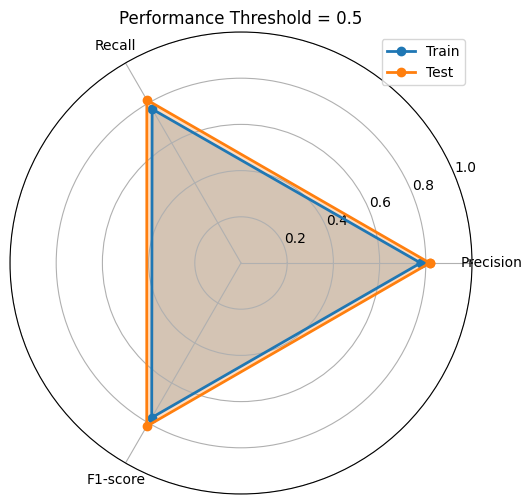

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       443
         1.0       0.73      0.69      0.71       261

    accuracy                           0.79       704
   macro avg       0.78      0.77      0.77       704
weighted avg       0.79      0.79      0.79       704

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        99
         1.0       0.80      0.78      0.79        78

    accuracy                           0.82       177
   macro avg       0.82      0.82      0.82       177
weighted avg       0.82      0.82      0.82       177



In [ ]:
radar_train_test(
    y_train_23, y_train_pred_23,
    y_test_23,  y_test_pred_23,
    title="Performance Threshold = 0.5"
)

print(classification_report(y_train_23, y_train_pred_23))
print(classification_report(y_test_23, y_test_pred_23))


**ANSWER**: From the results, the model performs well in predicting class 0, as it achieves high `precision`, `recall`, and `F1-score` on both the training and test sets. This strong performance is likely due to class `imbalance`in the training data, where `the number of samples labeled 0 is significantly greater than those labeled 1`, leading to a bias toward predicting class 0.

We conducted threshold tuning experiments to investigate how varying the decision threshold influences the model’s performance.
- Firstly we try to set threshold to 0.4 (make model predict class 1 more)

In [ ]:
X_train_3 = np.array(X_train_23)
y_train_3 = np.array(y_train_23).ravel()

# Call model class
model_3 = LogisticRegressionSelfMade(threshold=0.4)
model_3.fit(X_train_3, y_train_3)

# Predict
y_train_pred_3 = model_3.predict(np.array(X_train_3))
y_test_pred_3 = model_3.predict(np.array(X_test_23))

# Show Parameter
print(f"Weights: {model_3.weights}")
print(f"Bias: {model_3.bias}")

Weights: [-0.66551447  0.93025321 -0.23881104  0.12773753]
Bias: -0.533593910903719


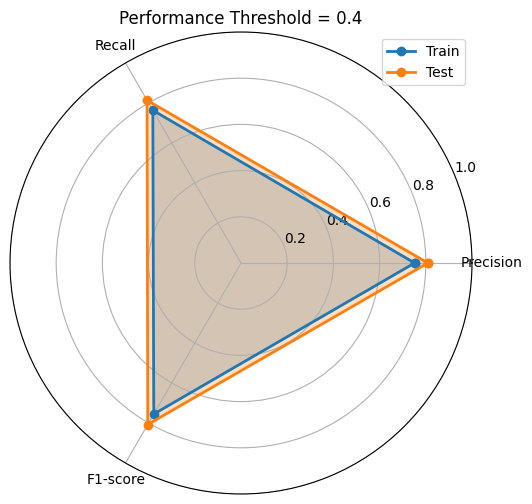

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81       443
         1.0       0.66      0.75      0.70       261

    accuracy                           0.77       704
   macro avg       0.75      0.76      0.76       704
weighted avg       0.78      0.77      0.77       704

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82        99
         1.0       0.74      0.86      0.80        78

    accuracy                           0.81       177
   macro avg       0.81      0.81      0.81       177
weighted avg       0.82      0.81      0.81       177



In [ ]:
radar_train_test(
    y_train_3, y_train_pred_3,
    y_test_23,  y_test_pred_3,
    title="Performance Threshold = 0.4"
)
print(classification_report(y_train_3, y_train_pred_3))
print(classification_report(y_test_23, y_test_pred_3))

**ANSWER**: From the results, the model with threshold 0.4 is performs better than model with threshold 0.5 in predicting class 1 indicated by the higher recall value.

- Then we try to set threshold to 0.6 (make model predict class 0 more)

In [ ]:
X_train_4 = np.array(X_train_23)
y_train_4 = np.array(y_train_23).ravel()

# Call model class
model_4 = LogisticRegressionSelfMade(threshold=0.6)
model_4.fit(X_train_4, y_train_4)

# Predict
y_train_pred_4 = model_4.predict(np.array(X_train_4))
y_test_pred_4 = model_4.predict(np.array(X_test_23))

# Show Parameter
print(f"Weights: {model_4.weights}")
print(f"Bias: {model_4.bias}")

Weights: [-0.66551447  0.93025321 -0.23881104  0.12773753]
Bias: -0.533593910903719


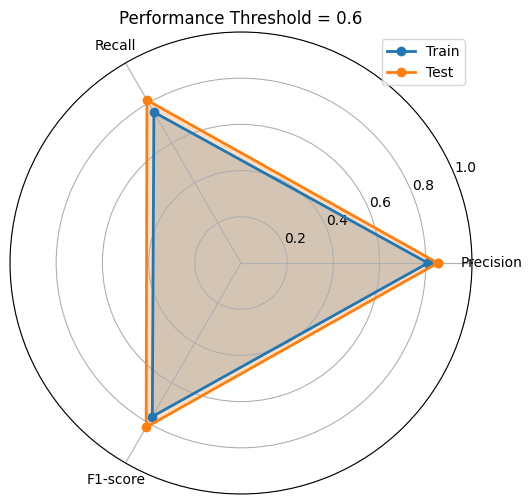

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85       443
         1.0       0.83      0.58      0.68       261

    accuracy                           0.80       704
   macro avg       0.81      0.75      0.77       704
weighted avg       0.80      0.80      0.79       704

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86        99
         1.0       0.91      0.68      0.78        78

    accuracy                           0.83       177
   macro avg       0.85      0.81      0.82       177
weighted avg       0.84      0.83      0.83       177



In [ ]:
radar_train_test(
    y_train_4, y_train_pred_4,
    y_test_23,  y_test_pred_4,
    title="Performance Threshold = 0.6"
)
print(classification_report(y_train_4, y_train_pred_4))
print(classification_report(y_test_23, y_test_pred_4))

**ANSWER**: From the results, the model with a threshold of 0.6 performs worse than the model with a threshold of 0.5 in predicting class 1, as indicated by the lower recall value. that mean this model will predict class 1 lessly 

In [ ]:
my_experiments = [
    {'y_train': y_train_3, 'y_train_pred': y_train_pred_3, 'y_test': y_test_23, 'y_test_pred': y_test_pred_3, 'title': 'Performance Threshold = 0.4'},
    {'y_train': y_train_23, 'y_train_pred': y_train_pred_23, 'y_test': y_test_23, 'y_test_pred': y_test_pred_23, 'title': 'Performance Threshold = 0.5'},
    {'y_train': y_train_4, 'y_train_pred': y_train_pred_4, 'y_test': y_test_23, 'y_test_pred': y_test_pred_4, 'title': 'Performance Threshold = 0.6'}
]

# radar_train_test_multi(my_experiments)
# radar_train_test_weight_multi(my_experiments)

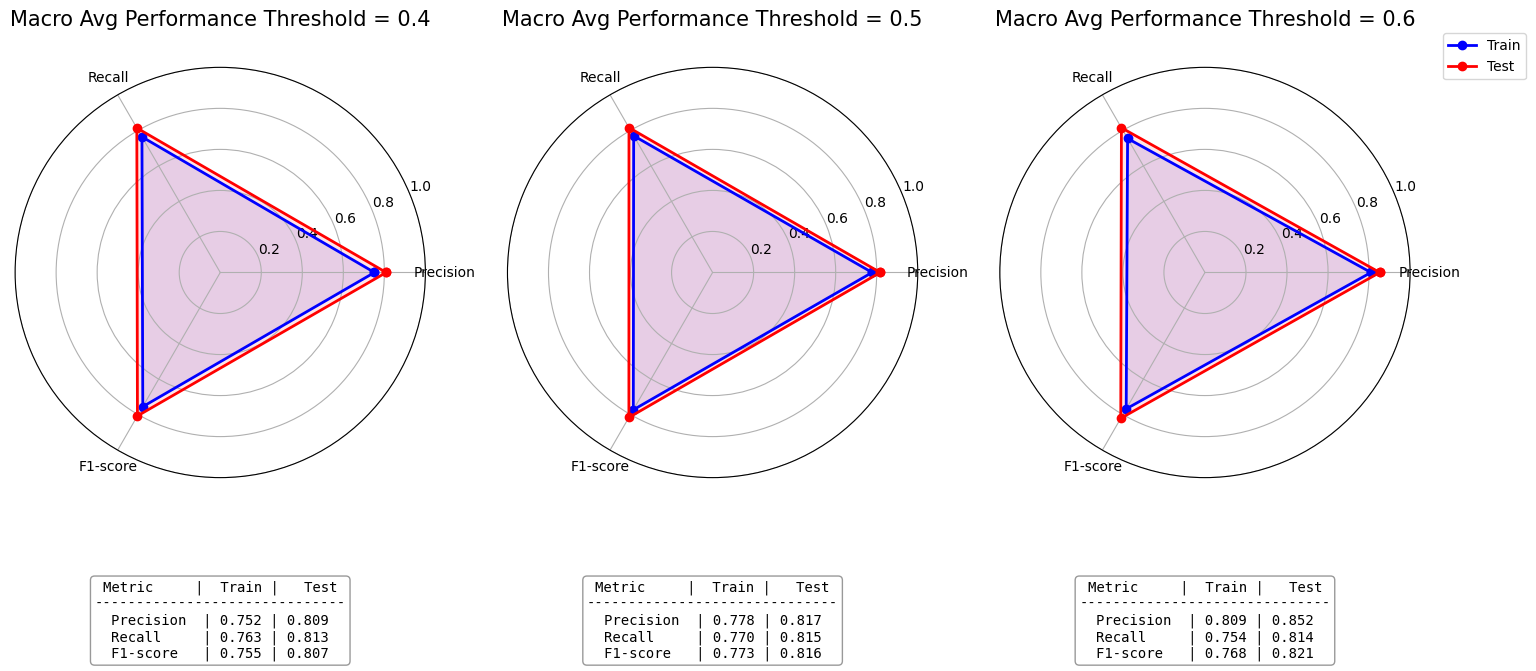
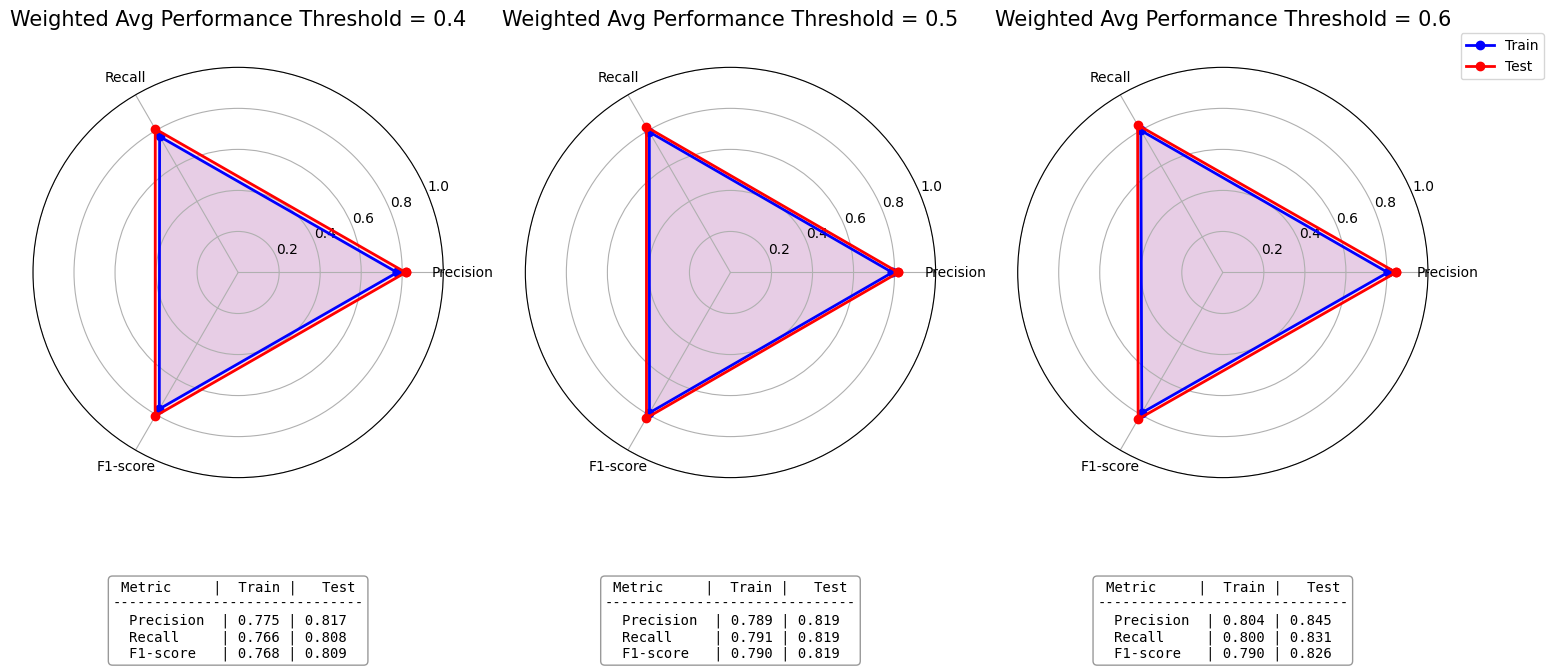

**ANSWER**: We have 2 sets of result first one is macro average score calculates the metric (precision, recall, or F1-score) for each class independently and then takes the unweighted arithmetic mean and weighted average calculates the metric for each class, but then takes a mean weighted by the support (the number of true instances) for each class. 

For Macro Average Best Threshold is the 0.6 threshold shows the strongest Macro F1-score ($0.821$ on Test), indicating that a higher confidence requirement helps the model distinguish between classes more effectively.

For Weighted Average Similar to the Macro average, the 0.6 threshold yields the highest Test F1-score ($0.826$).

From the result as you can see  When you increase the threshold to 0.6, you are requiring the model to be more "certain" before it predicts a specific class. In your case, this significantly improved Macro Precision (from $0.809$ to $0.852$), meaning that when the model does predict the minority class, it is much more likely to be correct.But it the Precision-Recall Trade-off While Macro F1-score peaked at $0.821$ with the $0.6$ threshold, you'll notice in your radar charts that as Precision expands outward, Recall tends to pull inward. This is the model becoming "pickier" it makes fewer mistakes (higher precision) but might miss some actual cases (lower recall).

### 2.5 Try adding some higher order features to your training 
e.g. (x1^2,x1,x2,...) and explain why these non-linear features are introduced (you can use
concepts in the ML class). Does this model have better accuracy on the training
set? How does it perform on the test set?

In this section, we experiment with higher-order features.

Why these non-linear features are introduced?

**ANSWER** We select `Age` as the feature for generating higher-order terms because it is a numerical variable, unlike the other features, which are categorical. 
- Additionally, we explore the effect of adding higher-order terms derived from categorical features to observe how they influence the model’s performance.

We generating the second order of 3 class `Age` , `Embarked` ,`Pclass` and the third order of class `Age` to the datasets

In [ ]:
df_add_feature = df.assign(Age_square = df['Age'] ** 2)
df_add_feature = df_add_feature.assign(Emb_square = df_add_feature['Embarked'] ** 2)
df_add_feature = df_add_feature.assign(Pclass_square = df_add_feature['Pclass'] ** 2)
df_add_feature = df_add_feature.assign(Age_cubed = df_add_feature['Age'] ** 3)
df_add_feature.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_square,Emb_square,Pclass_square,Age_cubed
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,0.384790,2.307605,0.351873,28.580216,0.465380,0.368899,30.272544,0.362089,992.514727,0.536890,6.021566,39925.963554
std,0.486822,0.835055,0.477826,13.262188,0.883687,0.797088,41.192295,0.637372,915.027983,1.139702,3.440499,58481.622160
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.176400,0.000000,1.000000,0.074088
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,484.000000,0.000000,4.000000,10648.000000
50%,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000,576.000000,0.000000,9.000000,13824.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.500000,1.000000,1225.000000,1.000000,9.000000,42875.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,263.000000,2.000000,6400.000000,4.000000,9.000000,512000.000000


Train with Additional `Age_square` feature

In [ ]:
# Split Data into Train:Test = 80:20
train_data_25, test_data_25 = train_test_split(df_add_feature, test_size=0.2, random_state=42)

# X_train and X_test with Age_square Feature
# X_train_25 = np.array(train_data_25[["Pclass","Sex","Age","Embarked","Age_square","Pclass_square","Emb_square"]].values, dtype = float)
# X_test_25 = np.array(test_data_25[["Pclass","Sex","Age","Embarked","Age_square","Pclass_square","Emb_square"]].values, dtype = float)
X_train_25 = np.array(train_data_25[["Pclass","Sex","Age","Embarked","Age_square"]].values, dtype = float)
X_test_25 = np.array(test_data_25[["Pclass","Sex","Age","Embarked","Age_square"]].values, dtype = float)

# Standardlization Data
scaler = StandardScaler()
X_train_25 = scaler.fit_transform(X_train_25)
y_train_25 = np.array(train_data_25[["Survived"]].values, dtype = float)

X_test_25 = scaler.transform(X_test_25)
y_test_25 = np.array(test_data_25[["Survived"]].values, dtype = float)

In [ ]:
X_train_25 = np.array(X_train_25)
y_train_25 = np.array(y_train_25).ravel()
model_25 = LogisticRegressionSelfMade()
model_25.fit(X_train_25, y_train_25)

y_train_pred_25 = model_25.predict(np.array(X_train_25))
y_test_pred_25 = model_25.predict(np.array(X_test_25))

print(f"Weights: {model_25.weights}")
print(f"Bias: {model_25.bias}")

Weights: [-0.67554087  0.92906594 -0.19459535  0.12653317 -0.0719671 ]
Bias: -0.5338140779519776


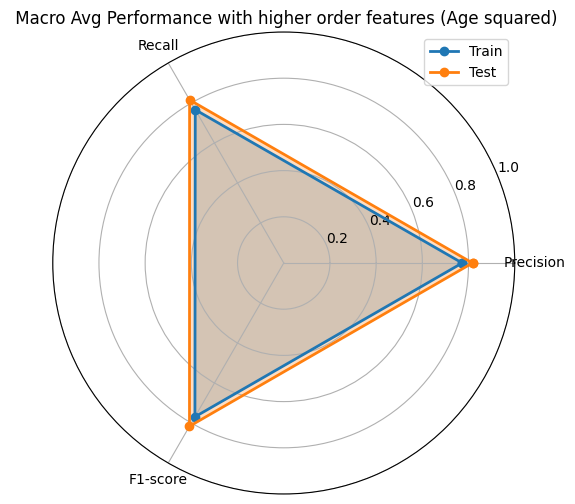

Model with  higher order features (Age squared) Performance:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       443
         1.0       0.72      0.69      0.70       261

    accuracy                           0.79       704
   macro avg       0.77      0.77      0.77       704
weighted avg       0.79      0.79      0.79       704

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        99
         1.0       0.80      0.78      0.79        78

    accuracy                           0.82       177
   macro avg       0.82      0.82      0.82       177
weighted avg       0.82      0.82      0.82       177



In [ ]:
radar_train_test(
    y_train_25, y_train_pred_25,
    y_test_25,  y_test_pred_25,
    title=" Macro Avg Performance with higher order features (Age squared)"
)
print("Model with  higher order features (Age squared) Performance:")
print(classification_report(y_train_25, y_train_pred_25))
print(classification_report(y_test_25, y_test_pred_25))



In [ ]:
# X_train and X_test with Age_square Feature
X_train_25_2 = np.array(train_data_25[["Pclass","Sex","Age","Embarked","Age_square","Pclass_square","Emb_square"]].values, dtype = float)
X_test_25_2 = np.array(test_data_25[["Pclass","Sex","Age","Embarked","Age_square","Pclass_square","Emb_square"]].values, dtype = float)

# Standardlization Data
scaler = StandardScaler()
X_train_25_2 = scaler.fit_transform(X_train_25_2)
X_test_25_2 = scaler.fit_transform(X_test_25_2)

In [ ]:
X_train_25_2 = np.array(X_train_25_2)
y_train_25 = np.array(y_train_25).ravel()
model_25_2 = LogisticRegressionSelfMade()
model_25_2.fit(X_train_25_2, y_train_25)

y_train_pred_25_2 = model_25_2.predict(np.array(X_train_25_2))
y_test_pred_25_2 = model_25_2.predict(np.array(X_test_25_2))

print(f"Weights: {model_25_2.weights}")
print(f"Bias: {model_25_2.bias}")

Weights: [-0.40749462  0.92992784 -0.22489251  0.11973962 -0.10411024 -0.41006169
  0.02753067]
Bias: -0.5430343904966285


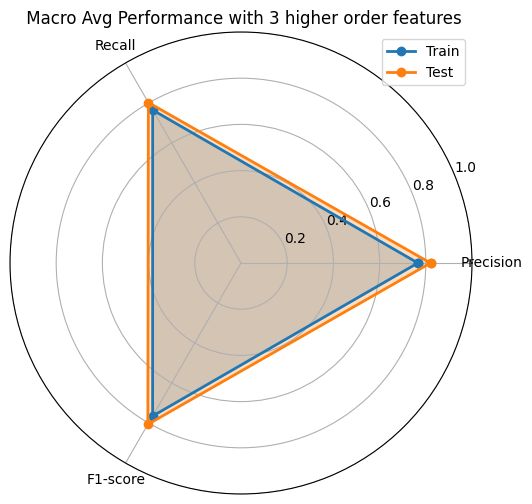

Model with 3 higher order features Performance:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       443
         1.0       0.71      0.70      0.70       261

    accuracy                           0.78       704
   macro avg       0.77      0.76      0.77       704
weighted avg       0.78      0.78      0.78       704

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.85      0.71      0.77        78

    accuracy                           0.81       177
   macro avg       0.82      0.80      0.81       177
weighted avg       0.82      0.81      0.81       177



In [ ]:
radar_train_test(
    y_train_25, y_train_pred_25_2,
    y_test_25,  y_test_pred_25_2,
    title=" Macro Avg Performance with 3 higher order features"
)
print("Model with 3 higher order features Performance:")
print(classification_report(y_train_25, y_train_pred_25_2))
print(classification_report(y_test_25, y_test_pred_25_2))



In [ ]:
# X_train and X_test with Age_square Feature
X_train_25_3 = np.array(train_data_25[["Pclass","Sex","Age","Embarked","Age_cubed"]].values, dtype = float)
X_test_25_3 = np.array(test_data_25[["Pclass","Sex","Age","Embarked","Age_cubed"]].values, dtype = float)

# Normalize Data
scaler = StandardScaler()
X_train_25_3 = scaler.fit_transform(X_train_25_3)
X_test_25_3 = scaler.fit_transform(X_test_25_3)

In [ ]:
X_train_25_3 = np.array(X_train_25_3)
y_train_25 = np.array(y_train_25).ravel()
model_25_3 = LogisticRegressionSelfMade()
model_25_3.fit(X_train_25_3, y_train_25)

y_train_pred_25_3 = model_25_3.predict(np.array(X_train_25_3))
y_test_pred_25_3 = model_25_3.predict(np.array(X_test_25_3))

print(f"Weights: {model_25_3.weights}")
print(f"Bias: {model_25_3.bias}")

Weights: [-0.67091524  0.92959445 -0.21433719  0.12725771 -0.03958328]
Bias: -0.5336673923226044


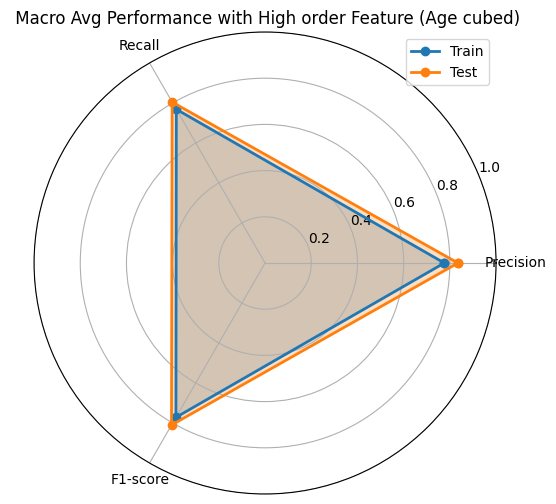

Model with 3 higher order features Performance:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       443
         1.0       0.73      0.69      0.71       261

    accuracy                           0.79       704
   macro avg       0.78      0.77      0.77       704
weighted avg       0.79      0.79      0.79       704

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        99
         1.0       0.88      0.68      0.77        78

    accuracy                           0.82       177
   macro avg       0.83      0.80      0.81       177
weighted avg       0.83      0.82      0.81       177



In [ ]:
radar_train_test(
    y_train_25, y_train_pred_25_3,
    y_test_25,  y_test_pred_25_3,
    title=" Macro Avg Performance with High order Feature (Age cubed)"
)
print("Model with 3 higher order features Performance:")
print(classification_report(y_train_25, y_train_pred_25_3))
print(classification_report(y_test_25, y_test_pred_25_3))

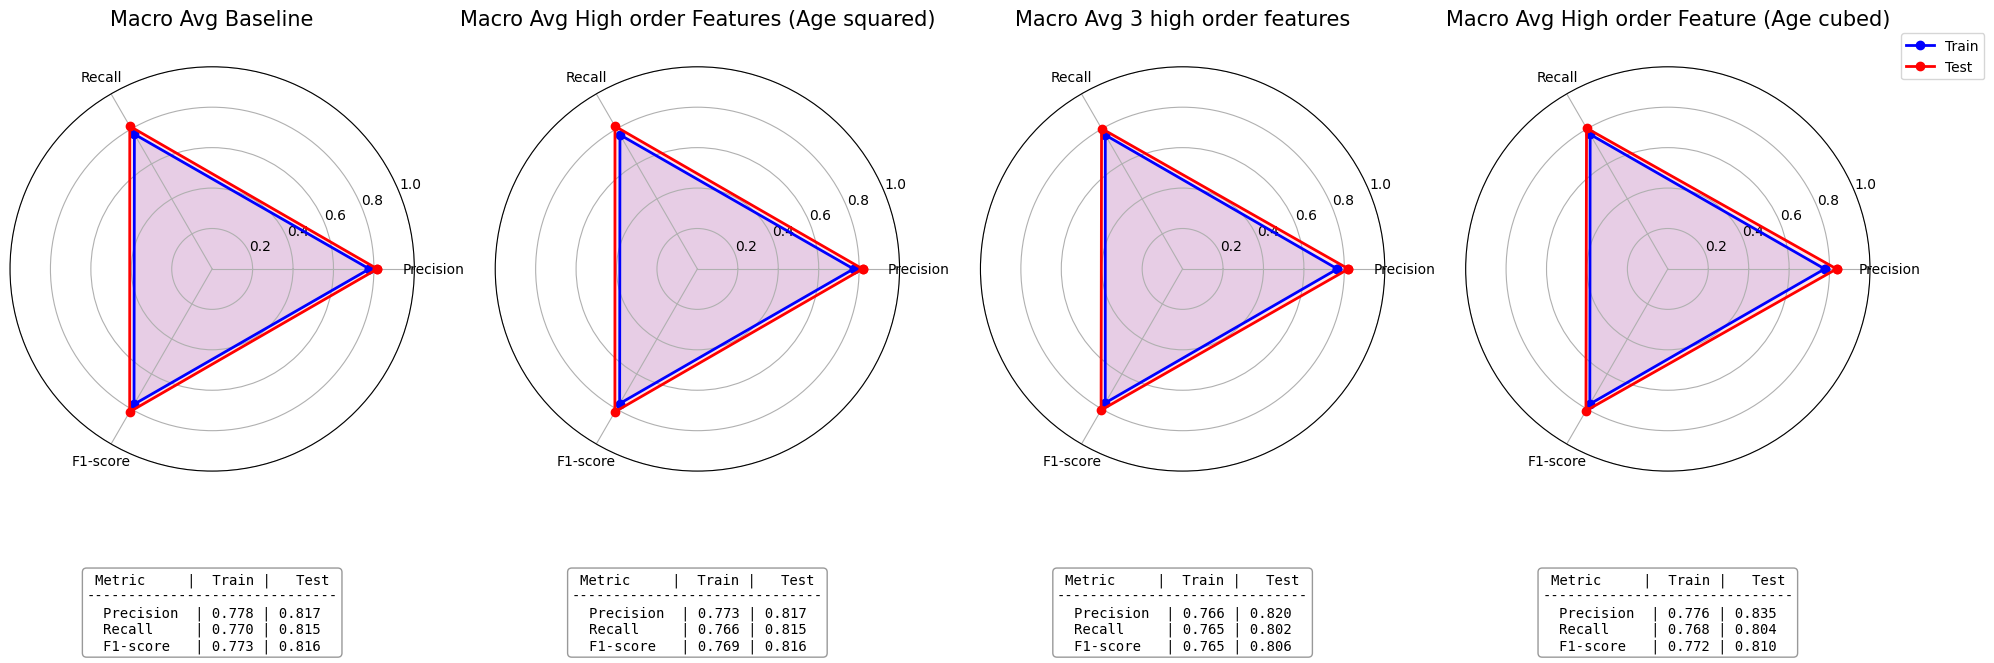

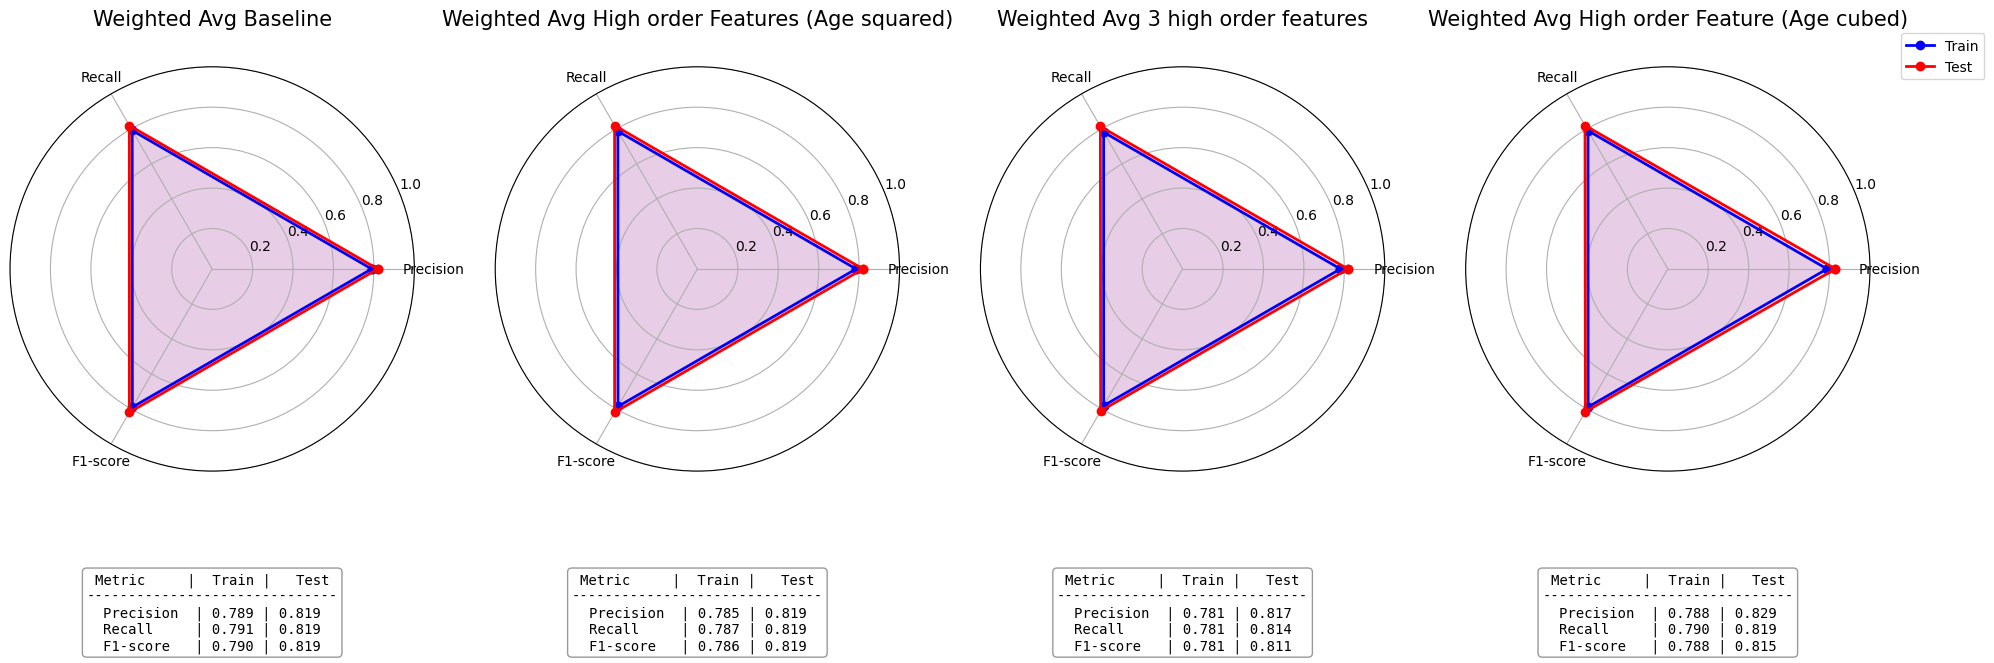

In [ ]:
my_experiments = [
    {'y_train': y_train_23, 'y_train_pred': y_train_pred_23, 'y_test': y_test_23, 'y_test_pred': y_test_pred_23, 'title': 'Baseline'},
    {'y_train': y_train_25, 'y_train_pred': y_train_pred_25, 'y_test': y_test_25, 'y_test_pred': y_test_pred_25, 'title': 'High order Features (Age squared)'},
    {'y_train': y_train_25, 'y_train_pred': y_train_pred_25_2, 'y_test': y_test_25, 'y_test_pred': y_test_pred_25_2, 'title': '3 high order features'},
    {'y_train': y_train_25, 'y_train_pred': y_train_pred_25_3, 'y_test': y_test_25, 'y_test_pred': y_test_pred_25_3, 'title': 'High order Feature (Age cubed)'}
]

radar_train_test_multi(my_experiments)
radar_train_test_weight_multi(my_experiments)

Does this model have better accuracy on the training set?

**ANSWER** : No, if we compare to baseline model (first order feature) but after we increase order of features performance seem recovers, nearly matching the baseline again.

How does it perform on the test set?

**ANSWER** : The model performs consistently and robustly on the test set, with scores staying largely in the 0.81 to 0.82 range across all metrics. 
In the Baseline and `Age squared` models, the test F1-score is 0.819.
In the 3 high order features model, there is a tiny dip in test performance (F1-score: 0.811).
In the `Age cubed` model, the test performance remains strong with an F1-score of 0.815. 

The red "Test" line nearly overlaps with the blue "Train" line in every scenario, which suggests the model generalizes extremely well to unseen data.

### 2.6 What happens if you reduce the number of features to just Sex and Age?

In [ ]:
train_data_26, test_data_26 = train_test_split(df, test_size=0.2, random_state=42)
X_train_26 = np.array(train_data_26[["Sex","Age"]].values, dtype = float)
X_test_26 = np.array(test_data_26[["Sex","Age"]].values, dtype = float)

scaler = StandardScaler()
X_train_26 = scaler.fit_transform(X_train_26)
y_train_26 = np.array(train_data_26[["Survived"]].values, dtype = float)

X_test_26 = scaler.transform(X_test_26)
y_test_26 = np.array(test_data_26[["Survived"]].values, dtype = float)

In [ ]:
X_train_26 = np.array(X_train_26)
y_train_26 = np.array(y_train_26).ravel()
model_26 = LogisticRegressionSelfMade()
model_26.fit(X_train_26, y_train_26)

y_train_pred_26 = model_26.predict(np.array(X_train_26))
y_test_pred_26 = model_26.predict(np.array(X_test_26))

print(f"Weights: {model_26.weights}")
print(f"Bias: {model_26.bias}")

Weights: [ 0.96544935 -0.07567551]
Bias: -0.5177490215105185


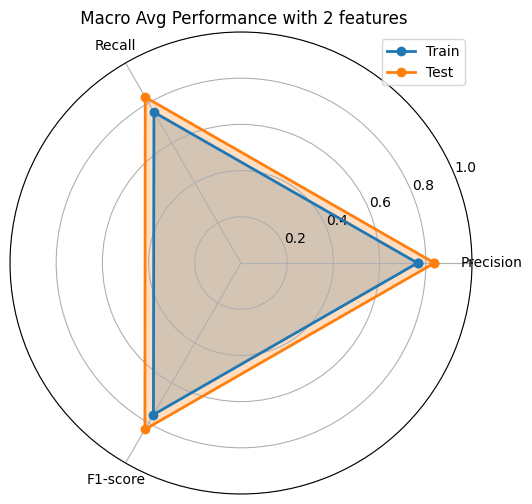

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       443
         1.0       0.72      0.66      0.69       261

    accuracy                           0.78       704
   macro avg       0.76      0.75      0.76       704
weighted avg       0.78      0.78      0.78       704

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        99
         1.0       0.85      0.77      0.81        78

    accuracy                           0.84       177
   macro avg       0.84      0.83      0.83       177
weighted avg       0.84      0.84      0.84       177



In [ ]:
radar_train_test(
    y_train_26, y_train_pred_26,
    y_test_26,  y_test_pred_26,
    title=" Macro Avg Performance with 2 features"
)

print(classification_report(y_train_26, y_train_pred_26))
print(classification_report(y_test_26, y_test_pred_26))

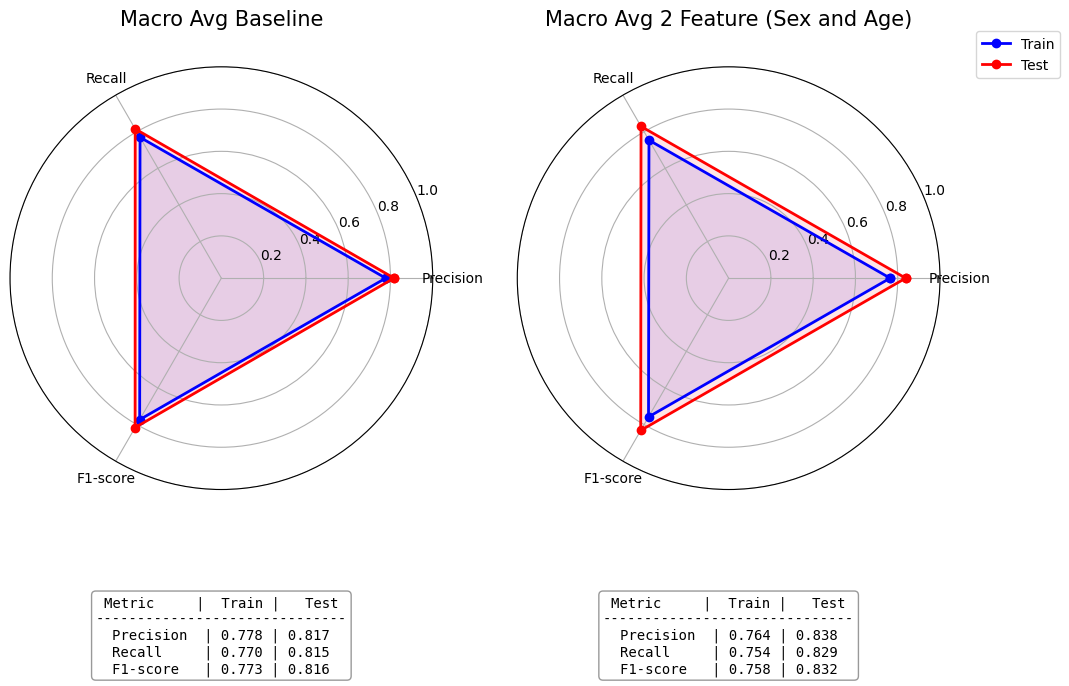

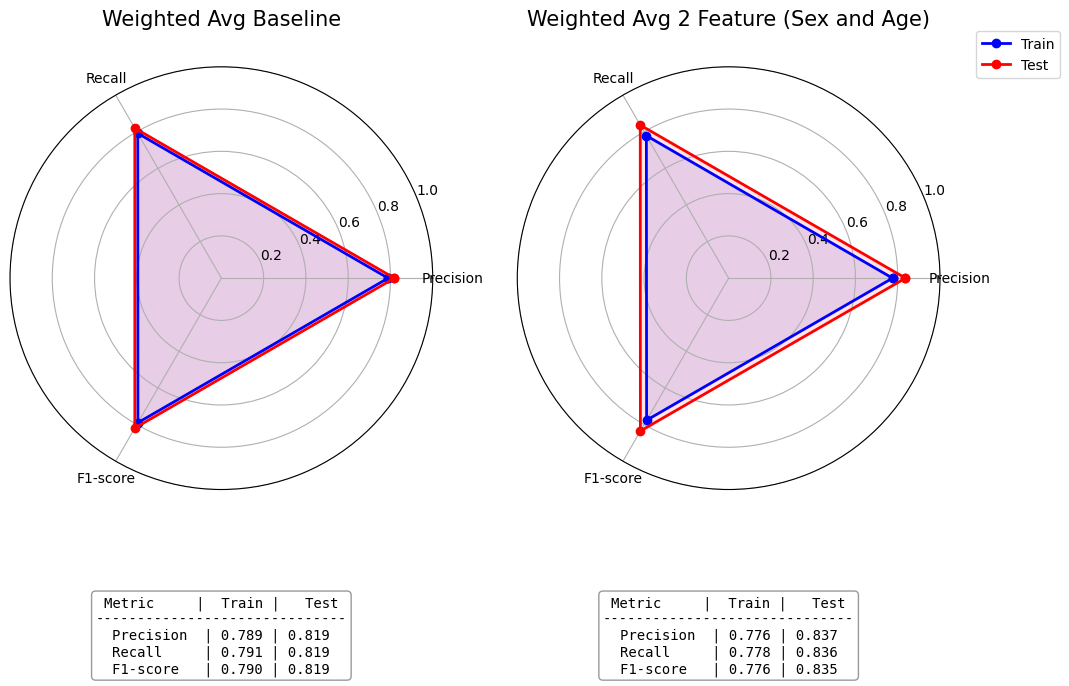

In [ ]:
my_experiments = [
    {'y_train': y_train_23, 'y_train_pred': y_train_pred_23, 'y_test': y_test_23, 'y_test_pred': y_test_pred_23, 'title': 'Baseline'},
    {'y_train': y_train_26, 'y_train_pred': y_train_pred_26, 'y_test': y_test_26, 'y_test_pred': y_test_pred_26, 'title': '2 Feature (Sex and Age)'}
]

radar_train_test_multi(my_experiments)
radar_train_test_weight_multi(my_experiments)

**ANSWER** : After we reduce the features to just `Sex` and `Age`, the model's performance exhibits a slight decrease in the training set but a measurable improvement in generalization on the test set.

The training metrics drop slightly (from ~0.79 to ~0.77). While this suggests a minor move toward `underfitting`, the overall result is a more robust model.

This suggests that the baseline model might have been using extra features that helped "memorize" the training data but weren't as useful for the test data.

### 2.7 We want to show that matrix inversion yields the same answer as the gradient descent method.
However, there is no closed form solution for logistic
regression. Thus, we will use normal linear regression instead. Re-do the Titanic
task as a regression problem by using linear regression. Use the gradient descent
method. Then, show your weights and loss values of training set and test set
(Mean Squared Errors (MSE)).

In [98]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iters = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # 1. Initial weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 2. Gradient Descent Loop
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # 3. Calculate Gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # 4. Update Parameter
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


**Preprocess our dataset**
- transfrom data using the standard normalize, preventing bias in model

In [99]:
# Split data into Train:Test = 80:20
train_data_27, test_data_27 = train_test_split(df, test_size=0.2, random_state=42)
X_train_27 = np.array(train_data_27[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
X_test_27 = np.array(test_data_27[["Pclass","Sex","Age","Embarked"]].values, dtype = float)

# Normalize Data
scaler = StandardScaler()
X_train_27 = scaler.fit_transform(X_train_27)
y_train_27 = np.array(train_data_27[["Survived"]].values, dtype = float)

X_test_27 = scaler.transform(X_test_27)
y_test_27 = np.array(test_data_27[["Survived"]].values, dtype = float)

In [106]:
X_train_27 = np.array(X_train_27)
y_train_27 = np.array(y_train_27).ravel()

model_27 = LinearRegression()
model_27.fit(X_train_27, y_train_27)

y_train_pred_27 = model_27.predict(np.array(X_train_27))
y_test_pred_27 = model_27.predict(np.array(X_test_27))

print(f"Weights: {model_27.weights}")
print(f"Bias: {model_27.bias}")

Weights: [-0.15931393  0.22109751 -0.06848904  0.02459988]
Bias: 0.3707226311142412


In [110]:
train_mse_27 = np.mean((y_train_27 - y_train_pred_27)**2)
test_mse_27 = np.mean((y_test_27 - y_test_pred_27)**2)
print(f"Train MSE: {train_mse_27:.4f}")
print(f"Test MSE: {test_mse_27:.4f}")

Train MSE: 0.1488
Test MSE: 0.3353


- While the Mean Squared Error (MSE) loss in a linear regression model measures the accuracy of continuous output predictions, it is not an ideal metric for classification tasks. MSE alone cannot effectively evaluate how well a model categorizes data; therefore, we must threshold the output to convert continuous predictions into discrete classes for performance comparison.

In [ ]:
y_train_class_27 = (y_train_pred_27 > 0.5).astype(float)
y_test_class_27 = (y_test_pred_27 > 0.5).astype(float)

# Optional: Print classification metrics
# from sklearn.metrics import classification_report, accuracy_score

# print("--- Train Set Classification Report ---")
# print(classification_report(y_train_27, y_train_class_27))

# print("--- Test Set Classification Report ---")
# print(classification_report(y_test_27, y_test_class_27))


**Thesholding Linear Regression**

**Report 1: Training Set**
| Metric | Class 0.0 | Class 1.0 | Macro Avg | Weighted Avg |
| :--- | :---: | :---: | :---: | :---: |
| **Precision** | 0.82 | 0.74 | 0.78 | 0.79 |
| **Recall** | 0.86 | 0.69 | 0.77 | 0.79 |
| **F1-Score** | 0.84 | 0.71 | 0.77 | 0.79 |
| **Support** | 443 | 261 | 704 | 704 |
| **Accuracy** | | | **0.79** | |


**Report 1: Testing Set**
| Metric | Class 0.0 | Class 1.0 | Macro Avg | Weighted Avg |
| :--- | :---: | :---: | :---: | :---: |
| **Precision** | 0.83 | 0.80 | 0.82 | 0.82 |
| **Recall** | 0.85 | 0.78 | 0.82 | 0.82 |
| **F1-Score** | 0.84 | 0.79 | 0.82 | 0.82 |
| **Support** | 99 | 78 | 177 | 177 |
| **Accuracy** | | | **0.82** | |

**Logistic Regression**

**Report 1: Training Set**
 Metric | Class 0.0 | Class 1.0 | Macro Avg | Weighted Avg |
| :--- | :---: | :---: | :---: | :---: |
| **Precision** | 0.82 | 0.73 | 0.78 | 0.79 |
| **Recall** | 0.85 | 0.69 | 0.77 | 0.79 |
| **F1-Score** | 0.84 | 0.71 | 0.77 | 0.79 |
| **Support** | 443 | 261 | 704 | 704 |
| **Accuracy** | | | **0.79** | |


**Report 2: Test Set**
| Metric | Class 0.0 | Class 1.0 | Macro Avg | Weighted Avg |
| :--- | :---: | :---: | :---: | :---: |
| **Precision** | 0.83 | 0.80 | 0.82 | 0.82 |
| **Recall** | 0.85 | 0.78 | 0.82 | 0.82 |
| **F1-Score** | 0.84 | 0.79 | 0.82 | 0.82 |
| **Support** | 99 | 78 | 177 | 177 |
| **Accuracy** | | | **0.82** | |

**Performance comparison**
- We compare both model linear regression with thesholing and logistic regression, the classification result shows that thresholding linear regression can perform comparable performance to logistic regression. Both models have similar performance for classification, despite logistic regression has the non-linear function to classify (Sigmoid function)

**Feature comparison**
- ["Pclass","Sex","Age","Embarked"]

`Logistic Regression`
- Weights: [-0.66551447  0.93025321 -0.23881104  0.12773753]
- Bias: -0.533593910903719

`Thresholding Linear Regression`
- Weights: [-0.15931393  0.22109751 -0.06848904  0.02459988]
- Bias: 0.3707226311142412

From the `weight` of both models illustrate the feature's impact in regression/classification model, which higher weight mean the features have more impact to classify or predict the outout. The highest weight (absolute value) of this both is Sex,Pclass,Age,Embarked, respectively. While the `Sex` is the main factor to `Survived` in titanic diaster, `female` has higer chancee to survived. On the other hand `Pclass` show the higher value of this feature can lead to higher chance to `not Survived`, this mean First class ticket has higher chance to survived.SSS

### 2.8. Matrix inversion
Now try using matrix inversion instead. However, are the weights
learned from the two methods similar? Report the Mean Squared Errors (MSE)
of the difference between the two weights (2.7 and 2.8).

$$\theta = (X^T X)^{-1} X^T y$$

In [113]:
def calculate_theta(X, y):
    """
    X: Features
    y: Target
    """
    # 1. Calculate X Transpose
    X_transpose = X.T
    
    # 2. Calculate (X^T * X)
    XTX = np.dot(X_transpose, X)
    
    # 3. Calculate Inverse: (X^T * X)^-1
    XTX_inv = np.linalg.inv(XTX)
    
    # 4. Calculate X^T * y
    XTy = np.dot(X_transpose, y)
    
    # 5. theta = (XTX_inv) * (XTy)
    theta = np.dot(XTX_inv, XTy)
    
    return theta

In [114]:
X_train_28 = np.array(X_train_27)
y_train_28 = np.array(y_train_27)
X_test_28 = np.array(X_test_27)
y_test_28 = np.array(y_test_27)

theta_linear = calculate_theta(X_train_28, y_train_28)
print(theta_linear)
bias = 0.3707226311142412

y_train_pred_28 = np.dot(X_train_28, theta_linear) + bias
train_mse_28 = np.mean((y_train_28 - y_train_pred_28)**2)
print(f"Train MSE: {train_mse_28:.4f}")
y_test_pred_28 = np.dot(X_test_28, theta_linear) + bias
test_mse_28 = np.mean((y_test_28 - y_test_pred_28)**2)
print(f"Test MSE: {test_mse_28:.4f}")

[-0.15944518  0.22103559 -0.0686148   0.02461512]
Train MSE: 0.1488
Test MSE: 0.3353


In [117]:
print(f"Gradient Descent Train MSE: {train_mse_27:.4f}")
print(f"Close Form Train MSE:       {train_mse_28:.4f}\n")
print(f"Gradient Descent  Test MSE: {test_mse_27:.4f}")
print(f"Close Form Train MSE:       {test_mse_28:.4f}")

Gradient Descent Train MSE: 0.1488
Close Form Train MSE:       0.1488

Gradient Descent  Test MSE: 0.3353
Close Form Train MSE:       0.3353


MSE results of our close form linear regression and gradient descent linear regression is same. This idicate that linear regression can ensure the optimal without using gradient descent, no need parameter tuning for optimization. But the drawbacks of this methods is time and storage complexity.

In [120]:
y_train_class_28 = (y_train_pred_28 > 0.5).astype(float)
y_test_class_28 = (y_test_pred_28 > 0.5).astype(float)

# Optional: Print classification metrics
# from sklearn.metrics import classification_report, accuracy_score

print("Close form Solution")
print("--- Train Set Classification Report ---")
print(classification_report(y_train_28, y_train_class_28))
print("--- Test Set Classification Report ---")
print(classification_report(y_test_28, y_test_class_28))

Close form Solution
--- Train Set Classification Report ---
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       443
         1.0       0.74      0.69      0.71       261

    accuracy                           0.79       704
   macro avg       0.78      0.77      0.77       704
weighted avg       0.79      0.79      0.79       704

--- Test Set Classification Report ---
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        99
         1.0       0.80      0.78      0.79        78

    accuracy                           0.82       177
   macro avg       0.82      0.82      0.82       177
weighted avg       0.82      0.82      0.82       177



In [121]:
print("Gradient Solution")
print("--- Train Set Classification Report ---")
print(classification_report(y_train_27, y_train_class_27))
print("--- Test Set Classification Report ---")
print(classification_report(y_test_27, y_test_class_27))

Gradient Solution
--- Train Set Classification Report ---
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       443
         1.0       0.74      0.69      0.71       261

    accuracy                           0.79       704
   macro avg       0.78      0.77      0.77       704
weighted avg       0.79      0.79      0.79       704

--- Test Set Classification Report ---
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        99
         1.0       0.80      0.78      0.79        78

    accuracy                           0.82       177
   macro avg       0.82      0.82      0.82       177
weighted avg       0.82      0.82      0.82       177



- From the classification reports show the performance of classification, when theshold is 0.5. The performance of both models are the same!

`Thresholding Linear Regression`
- Weights: [-0.15931393  0.22109751 -0.06848904  0.02459988]
- Bias: 0.3707226311142412

`Close Form Linear Regression`
- Weights: [-0.15944518  0.22103559 -0.0686148   0.02461512]

The weights derived from both methods are remarkably similar, despite the differences in their optimization approaches and the inclusion of a bias term in the gradient descent implementation. Overall, these results demonstrate that linear regression can be effectively learned through either method; provided the optimization parameters for gradient descent—such as the learning rate and number of iterations—are well-tuned, both approaches should converge to the same result.